In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing CSV file

In [3]:
df = pd.read_csv(r'D:\Program Files\House\train.csv')
df_test = pd.read_csv(r'D:\Program Files\House\test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Cleaning

In [6]:
nulls = df.isnull().sum()/df.shape[0]*100

In [7]:
df.shape

(1460, 81)

In [8]:
null_items = nulls[nulls > 17].keys()
null_items

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
df2 = df.drop(columns=null_items)
df2.shape

(1460, 75)

In [10]:
df2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
df2.dropna(inplace=True)
nulls = df2.isnull().sum()/df.shape[0]*100


In [12]:
df2.shape, df2.isnull().sum().sum()

((1338, 75), 0)

In [13]:
df2['MSZoning'].value_counts()

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [14]:
X = df2.iloc[:, :74]
y = df2.iloc[:, 74]

In [15]:
# =================================================  ERROR

In [16]:
cat_vars = df2.select_dtypes('O').keys()

In [17]:
one_hot_enc = OneHotEncoder(drop='first')

In [18]:
X_sc = one_hot_enc.fit_transform(X[cat_vars])

In [19]:
# =================================================  ERROR

In [20]:
X_ohe = pd.get_dummies(df2, drop_first = True)
X_ohe.shape

(1338, 228)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=10)

<AxesSubplot:>

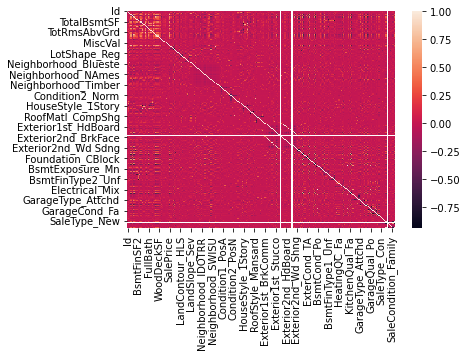

In [22]:
# plt.figure(figsize=(25,25))
sns.heatmap(X_train.corr())

# Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

sc.fit(X_train)

StandardScaler()

In [25]:
X_train_s = sc.transform(X_train)
X_test_s = sc.transform(X_test)

## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_s, y_train)

LinearRegression()

In [27]:
lr.score(X_test_s, y_test)

0.9999999999999928

## Backward Elimination

In [28]:
import statsmodels.api as sm

In [29]:
x = np.append(arr = np.ones(shape=(X_train_s.shape[0], 1), dtype='int64'), values=X_train_s, axis = 1)

regressor_OLS=sm.OLS(endog = y_train, exog=x).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.028e+29
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:06:49   Log-Likelihood:                 21805.
No. Observations:                1070   AIC:                        -4.317e+04
Df Residuals:                     848   BIC:                        -4.206e+04
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.868e+05   1.17e-11   1.59e+16      0.000    1.87e+05    1.87e+05
x1          3.638e-12    1.3e-11      0.279      0.780    -2.2e-11    2.92e-11
x2          6.094e-11   6.97e-11      0.874      0.382   -7.59e-11    1.98e-10
x3          6.203e-12   2.25e-11      0.275      0.783    -3.8e-11    5.04e-11
x4          2.956e-11   2.77e-11      1.067      0.286   -2.48e-11    8.39e-11
x5         -7.049e-12   1.98e-11     -0.355      0.722    -4.6e-11    3.19e-11
x6         -6.003e-11   5.24e-11     -1.146      0.252   -1.63e-10    4.28e-11
x7         -3.638e-12   2.41e-11     -0.151      0.880   -5.09e-11    4.36e-11
x8          2.728e-12   2.11e-11      0.129      0.897   -3.88e-11    4.42e-11
x9          1.171e-11   2.11e-11      0.556      0.578   -2.96e-11     5.3e-11
x10        -3.092e-11   2.58e-11     -1.200      0.230   -8.15e-11    1.96e-11
x11         7.958e-12   1.84e-11      0.432      0.666   -2.82e-11    4.42e-11
x12          9.55e-12   3.12e-11      0.306      0.760   -5.17e-11    7.08e-11
x13        -8.185e-12   3.66e-11     -0.223      0.823   -8.01e-11    6.37e-11
x14         5.457e-11   3.62e-11      1.508      0.132   -1.65e-11    1.26e-10
x15        -1.819e-12   1.89e-11     -0.096      0.923   -3.89e-11    3.52e-11
x16        -6.185e-11   2.74e-11     -2.255      0.024   -1.16e-10   -8.02e-12
x17        -5.502e-11   2.07e-11     -2.664      0.008   -9.56e-11   -1.45e-11
x18        -5.457e-12   1.45e-11     -0.377      0.706   -3.39e-11     2.3e-11
x19         1.273e-11   2.51e-11      0.508      0.612   -3.65e-11    6.19e-11
x20          3.57e-11   2.16e-11      1.654      0.099   -6.68e-12    7.81e-11
x21         -3.82e-11   2.21e-11     -1.732      0.084   -8.15e-11     5.1e-12
x22        -4.957e-11    2.3e-11     -2.153      0.032   -9.48e-11   -4.38e-12
x23         2.183e-11   3.07e-11      0.712      0.477   -3.84e-11     8.2e-11
x24        -3.257e-11   1.73e-11     -1.878      0.061   -6.66e-11    1.48e-12
x25        -1.273e-11   3.07e-11     -0.415      0.679    -7.3e-11    4.76e-11
x26         1.455e-11   2.91e-11      0.500      0.617   -4.25e-11    7.16e-11
x27         3.638e-12   2.98e-11      0.122      0.903   -5.49e-11    6.22e-11
x28         5.457e-12   1.47e-11      0.370      0.711   -2.35e-11    3.44e-11
x29         2.456e-11   1.58e-11      1.557      0.120   -6.39e-12    5.55e-11
x30         1.592e-12   1.58e-11      0.101      0.920   -2.94e-11    3.26e-11
x31        -2.683e-11   1.33e-11     -2.013      0.044    -5.3e-11   -6.71e-13
x32         2.365e-11   1.41e-11      1.678      0.094   -4.01e-12    5.13e-11
x33         9.095e-13   1.47e-11      0.062      0.951   -2.79e-11    2.97e-11
x34            -1e-11    1.4e-11     -0.713      0.476   -3.76e-11    1.75e-11
x35         2.046e-11   1.35e-11      1.513      0.131   -6.08e-12     4.7e-11
x3

In [30]:
p_values = regressor_OLS.pvalues
print(p_values)

const    0.000000
x1       0.780397
x2       0.382258
x3       0.783249
x4       0.286249
x5       0.722411
x6       0.252296
x7       0.879879
x8       0.897376
x9       0.578305
x10      0.230339
x11      0.666189
x12      0.759832
x13      0.823309
x14      0.131932
x15      0.923236
x16      0.024382
x17      0.007868
x18      0.706267
x19      0.611627
x20      0.098596
x21      0.083687
x22      0.031587
x23      0.476699
x24      0.060786
x25      0.678565
x26      0.616947
x27      0.902979
x28      0.711215
x29      0.119730
x30      0.919853
x31      0.044417
x32      0.093732
x33      0.950561
x34      0.476188
x35      0.130635
x36      0.517390
x37      0.000000
x38      0.162497
x39      0.616139
x40      0.871245
x41      0.693973
x42      0.338007
x43      0.774320
x44      0.131743
x45      0.128899
x46      0.163626
x47      0.040877
x48      0.214406
x49      0.705443
x50      0.395211
x51      0.264799
x52      0.576655
x53      0.954754
x54      1.000000
x55      0

In [31]:
optimal = []
for i, val in enumerate(p_values):
    if(val < 0.5):
        optimal.append(i)
len(optimal)

85

In [32]:
x_opt=x [:, optimal]  

regressor_OLS=sm.OLS(endog = y_train, exog=x_opt).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.856e+30
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:06:49   Log-Likelihood:                 22377.
No. Observations:                1070   AIC:                        -4.459e+04
Df Residuals:                     987   BIC:                        -4.418e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.868e+05   6.37e-12   2.93e+16      0.000    1.87e+05    1.87e+05
x1         -1.364e-11   1.13e-11     -1.210      0.227   -3.58e-11    8.49e-12
x2          3.865e-11   1.29e-11      2.999      0.003    1.34e-11    6.39e-11
x3         -3.956e-11   1.52e-11     -2.601      0.009   -6.94e-11   -9.71e-12
x4         -2.547e-11   1.22e-11     -2.084      0.037   -4.94e-11   -1.48e-12
x5         -2.001e-11   1.86e-11     -1.075      0.283   -5.65e-11    1.65e-11
x6          2.728e-11   1.85e-11      1.475      0.141   -9.03e-12    6.36e-11
x7          7.731e-12   8.17e-12      0.946      0.344   -8.31e-12    2.38e-11
x8         -4.547e-12   9.31e-12     -0.488      0.625   -2.28e-11    1.37e-11
x9          1.933e-11   1.01e-11      1.910      0.056   -5.28e-13    3.92e-11
x10        -4.547e-12   9.67e-12     -0.470      0.638   -2.35e-11    1.44e-11
x11        -1.273e-11   1.45e-11     -0.878      0.380   -4.12e-11    1.57e-11
x12        -1.137e-11   8.05e-12     -1.413      0.158   -2.72e-11    4.42e-12
x13         5.457e-12   7.35e-12      0.742      0.458   -8.97e-12    1.99e-11
x14         4.638e-11   6.64e-12      6.990      0.000    3.34e-11    5.94e-11
x15         2.501e-11   6.76e-12      3.702      0.000    1.18e-11    3.83e-11
x16        -3.729e-11   6.72e-12     -5.546      0.000   -5.05e-11   -2.41e-11
x17         4.206e-12   6.68e-12      0.629      0.529   -8.91e-12    1.73e-11
x18         7.856e+04   1.47e-11   5.34e+15      0.000    7.86e+04    7.86e+04
x19         1.637e-11   7.21e-12      2.271      0.023    2.22e-12    3.05e-11
x20         2.001e-11   8.94e-12      2.239      0.025    2.47e-12    3.75e-11
x21        -2.001e-11    6.7e-12     -2.986      0.003   -3.32e-11   -6.86e-12
x22         9.095e-12   7.53e-12      1.208      0.227   -5.68e-12    2.39e-11
x23        -4.457e-11   9.85e-12     -4.524      0.000   -6.39e-11   -2.52e-11
x24        -3.638e-12   9.79e-12     -0.372      0.710   -2.29e-11    1.56e-11
x25        -4.547e-11   1.18e-11     -3.840      0.000   -6.87e-11   -2.22e-11
x26         1.478e-11   7.11e-12      2.080      0.038    8.32e-13    2.87e-11
x27         1.592e-12   6.64e-12      0.240      0.811   -1.14e-11    1.46e-11
x28         7.276e-12   7.08e-12      1.027      0.305   -6.63e-12    2.12e-11
x29        -4.547e-12   7.62e-12     -0.597      0.551   -1.95e-11    1.04e-11
x30         -3.07e-12   7.57e-12     -0.405      0.685   -1.79e-11    1.18e-11
x31         -2.41e-11   7.17e-12     -3.363      0.001   -3.82e-11      -1e-11
x32        -1.637e-11   6.97e-12     -2.350      0.019      -3e-11    -2.7e-12
x33        -3.638e-12   6.61e-12     -0.550      0.582   -1.66e-11    9.34e-12
x34        -9.095e-12   7.17e-12     -1.268      0.205   -2.32e-11    4.98e-12
x35         1.569e-11   7.79e-12      2.014      0.044    4.05e-13     3.1e-11
x3

In [33]:
regressor_OLS.tvalues

const    2.932637e+16
x1      -1.209874e+00
x2       2.998567e+00
x3      -2.601010e+00
x4      -2.083736e+00
x5      -1.074682e+00
x6       1.474569e+00
x7       9.460308e-01
x8      -4.884579e-01
x9       1.910173e+00
x10     -4.702065e-01
x11     -8.778039e-01
x12     -1.412770e+00
x13      7.421619e-01
x14      6.990277e+00
x15      3.702341e+00
x16     -5.545979e+00
x17      6.292664e-01
x18      5.339364e+15
x19      2.270912e+00
x20      2.238533e+00
x21     -2.985527e+00
x22      1.207844e+00
x23     -4.523874e+00
x24     -3.715679e-01
x25     -3.840428e+00
x26      2.079506e+00
x27      2.396241e-01
x28      1.026988e+00
x29     -5.970421e-01
x30     -4.054131e-01
x31     -3.362675e+00
x32     -2.349800e+00
x33     -5.502498e-01
x34     -1.267950e+00
x35      2.014329e+00
x36      3.555945e+00
x37      2.805650e+00
x38     -1.680876e+00
x39     -4.658119e-01
x40     -3.643859e-01
x41      5.153121e-01
x42      3.036359e+00
x43     -8.534266e-02
x44      1.915764e+00
x45      2